# Project Three

https://classroom.github.com/a/feP-p3J8

#### Set-up

In [104]:
import matplotlib.pyplot as plt
import numpy as np
from random import randint

from sklearn.model_selection import train_test_split

from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.preprocessing import StandardScaler


from time import time
from sklearn.model_selection import GridSearchCV

## Optical Character Recognition

As a prototypical image analysis and categorization task we look at identifying the correct digit (0..9) in digital images of handwritten digits. For this project we'll use the digits dataset built into sklearn. In future projects we will the use the MNIST data set of handwritten digits which consists of larger images (28x28 pixels) and contains more samples (>50000).

#### sklearn digits dataset

In [2]:
from sklearn.datasets import load_digits

### a) Describe and visualize the data, for example how many samples, feature and target  dimensionality?  Visualize some of the digits (<=100). 

In [3]:
data = load_digits()

In [9]:
X = data.data
y = data.target
classes = data.target_names

The dataset contains 1,797 samples, each containing 8x8 image information. The value is essentially the intenstiy of the pixel.

In [12]:
X.shape

(1797, 64)

The target in this dataset is the digit number from 0 to 9.

In [14]:
classes

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

Plotted below are a few of the images in the dataset.

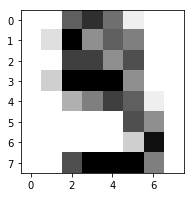

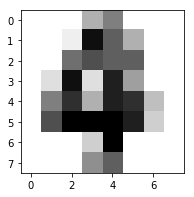

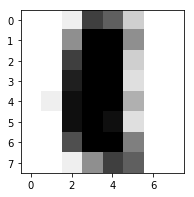

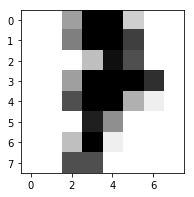

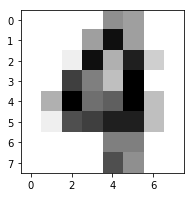

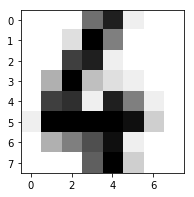

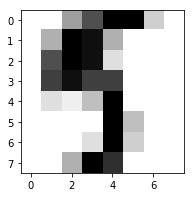

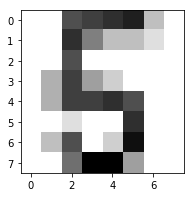

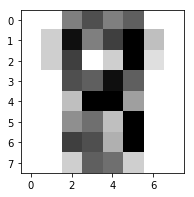

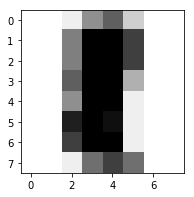

In [38]:
for i in range(10):
    i = randint(0, 1796)
    plt.figure(1, figsize=(3, 3))
    plt.imshow(data.images[i], cmap=plt.cm.gray_r, interpolation='nearest')
    plt.show()

### b) How useful is it to graph the dependency of the target on each feature or a pair of features as we have done in previous projects?  Read in the textbook and in the sklearn documentation about dimensionality reduction using 

** Principal Component Analysis (PCA)**

* https://jakevdp.github.io/PythonDataScienceHandbook/05.09-principal-component-analysis.html
* http://scikit-learn.org/stable/modules/decomposition.html

and

** Manifold Learning ** 

* https://jakevdp.github.io/PythonDataScienceHandbook/05.10-manifold-learning.html
* http://scikit-learn.org/stable/modules/manifold.html


Apply on example each of PCA and Manifold Learning to the digits data set. Keep two dimensions.

In [33]:
from sklearn.decomposition import PCA

In [34]:
kpca = PCA(n_components = 2)
X_kpca = kpca.fit_transform(X)

C:\Users\Sabrina Blancarte\Anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:106: MatplotlibDeprecationWarning: The spectral and spectral_r colormap was deprecated in version 2.0. Use nipy_spectral and nipy_spectral_r instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


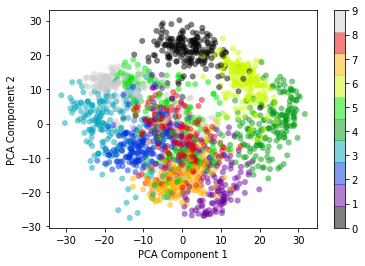

In [35]:
plt.scatter(X_kpca[:, 0], X_kpca[:, 1],
            c=data.target, edgecolor='none', alpha=0.5,
            cmap=plt.cm.get_cmap('spectral', 10))
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.colorbar();
plt.show()

In [48]:
from sklearn.manifold import Isomap
model = Isomap(n_components=2)
proj = model.fit_transform(X)

C:\Users\Sabrina Blancarte\Anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:106: MatplotlibDeprecationWarning: The spectral and spectral_r colormap was deprecated in version 2.0. Use nipy_spectral and nipy_spectral_r instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


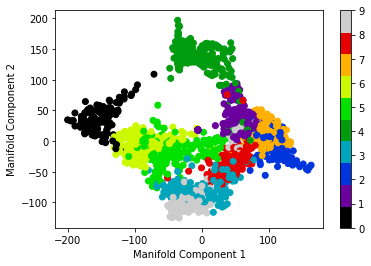

In [53]:
plt.scatter(proj[:, 0], proj[:, 1], c=data.target, cmap=plt.cm.get_cmap('spectral', 10))
plt.colorbar(ticks=range(10))
plt.xlabel('Manifold Component 1')
plt.ylabel('Manifold Component 2')
plt.show()

So it looks like both methods show very simillar results when it comes to the dimensionality reduction.
The coloring is the same and you can kind of see that the Isomap looks like a rotaed PCA with less uniform density.

### c) Supervised Learning

Apply one of the methods we have looked at so far for supervised learning (for example Support Vector Machines, Decision Trees and Random Forests) to the digits problem. Use model validation and parameter searches as needed. How accurate is your model? Use appropriate measures to describe the accuracy of your model.

In [54]:
from sklearn.ensemble import RandomForestClassifier

In [57]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, 
                                                    random_state = 5, stratify = y)

In [63]:
def perform_cross_validation(model, X, y, scaled = False):
    scaler = StandardScaler()
    if scaled == True:
        X = scaler.fit_transform(X)
        
    start = time()
    scores = cross_val_score(model, X, y, cv=5)
    end = time()
    print(str(model).split('(')[0] + ' Mean Accuracy', abs(scores).mean(), 'time =', str(end-start))

In [64]:
clf = RandomForestClassifier()

In [65]:
# Try random forest without scaling
perform_cross_validation(clf, X, y, False)

RandomForestClassifier Mean Accuracy 0.9105571962195708 time = 0.46028852462768555


In [66]:
perform_cross_validation(clf, X, y, True)

RandomForestClassifier Mean Accuracy 0.8982851064838118 time = 0.23042941093444824


It looks like scaling the data actually hurts the accuracy in this case.

In [98]:
def run_grid_search(model, params, X, y, scaled = False):
    if scaled:
        scaler = StandardScaler()
        X_train_ = scaler.fit_transform(X)
    
    grid = GridSearchCV(model, params, cv=5)
    grid.fit(X, y)
    results = grid.grid_scores_
    
    
    for key in params:
        optimized = key
    
    params = []
    scores = []
    for score in results:
        mean = score[1]
        try:
            param = score[0][optimized]
        except:
            print('error')
            break
            
        scores.append(abs(mean))
        params.append(param)
        
    ax = plt.subplot(111)
    ax.scatter(params, scores)
    ax.set_title('Grid Search Results for ' + str(model).split('(')[0])
    ax.set_xlabel('Parameter Tuned')
    ax.set_ylabel('Average Accuracy')
    plt.show()    

1) First going to optimize the number of trees in the ensemble.

In [73]:
nTrees = {'n_estimators' : [10, 50, 100, 500, 1000]}

C:\Users\Sabrina Blancarte\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:761: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


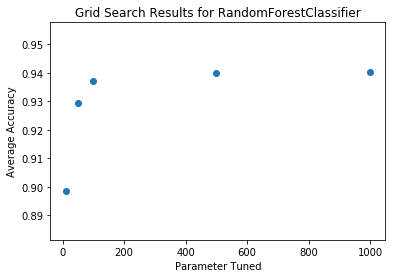

In [74]:
run_grid_search(clf, nTrees, X, y, scaled = False)

It looks like adding more trees makes the model more accurate. Now going to tune the reguralization of the trees by limiting max depth.

C:\Users\Sabrina Blancarte\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:761: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


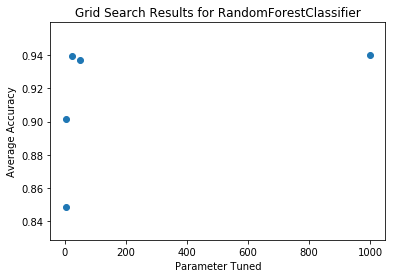

In [101]:
depth = {'max_depth' : [3, 5, 25, 50, 1000]}
run_grid_search(RandomForestClassifier(n_estimators=500), depth, X, y, scaled = False)

Also going to optimize the number of features that every tree looks at.

C:\Users\Sabrina Blancarte\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:761: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


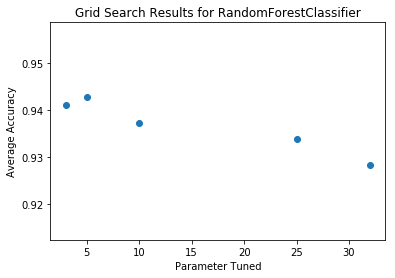

In [102]:
features = {'max_features' : [3, 5, 10, 25, 32]}
run_grid_search(RandomForestClassifier(n_estimators=500), features, X, y, scaled = False)

Looks like the max depth does not improve performance after about 25.

In [103]:
final_model = RandomForestClassifier(n_estimators=500, max_depth=25, max_features=5)
perform_cross_validation(final_model, X, y, False)

RandomForestClassifier Mean Accuracy 0.943845233880792 time = 4.920596599578857


Incresed the accuracy of the model by 3% by optimizing the hyperparameters.

Also going to plot the area under the curve to understand the accuracy of the model.

### d) Exploration: Unsupervised Learning

This part is optional. In supervised learning we use labelled data to train or build a model. In the case of the images of handwritten digits each image is label with the (hopefully) correct digit 0..9. Unsupervised learning tries to extract the fact that there are 10 different objects (the digits 0..9) from the images without knowing the labels. Learn in the textbook about

** k-means Clustering*

* https://jakevdp.github.io/PythonDataScienceHandbook/05.11-k-means.html

and apply some of the techiques to the digits problem.

In [116]:
from sklearn.cluster import KMeans

In [141]:
cluster = KMeans(n_clusters=10).fit(X)
yp = cluster.predict(X)

In [151]:
#Conveting all to the same scale
from scipy.stats import mode

labels = np.zeros_like(y_p)
for i in range(10):
    mask = (y_p == i)
    labels[mask] = mode(data.target[mask])[0]

Below are the cluster labels shown on the manifold projection.

C:\Users\Sabrina Blancarte\Anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:106: MatplotlibDeprecationWarning: The spectral and spectral_r colormap was deprecated in version 2.0. Use nipy_spectral and nipy_spectral_r instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


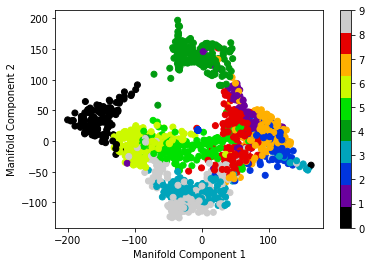

In [154]:
plt.scatter(proj[:, 0], proj[:, 1], c=labels, cmap=plt.cm.get_cmap('spectral', 10))
plt.colorbar(ticks=range(10))
plt.xlabel('Manifold Component 1')
plt.ylabel('Manifold Component 2')
plt.show()

We can see that there it properly clustered most of the digits. The simillar segregation of the colors is the indicator.

C:\Users\Sabrina Blancarte\Anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:106: MatplotlibDeprecationWarning: The spectral and spectral_r colormap was deprecated in version 2.0. Use nipy_spectral and nipy_spectral_r instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


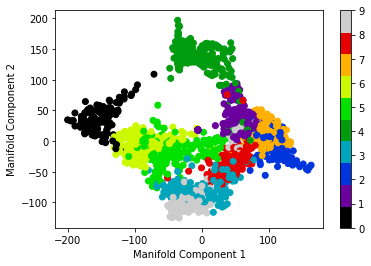

In [153]:
plt.scatter(proj[:, 0], proj[:, 1], c=data.target, cmap=plt.cm.get_cmap('spectral', 10))
plt.colorbar(ticks=range(10))
plt.xlabel('Manifold Component 1')
plt.ylabel('Manifold Component 2')
plt.show()

Below the cluster means are plotted.

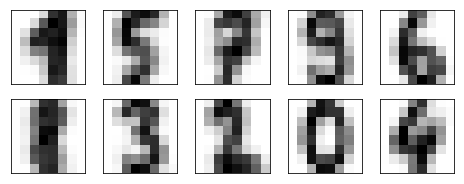

In [125]:
fig, ax = plt.subplots(2, 5, figsize=(8, 3))
centers = cluster.cluster_centers_.reshape(10, 8, 8)
for axi, center in zip(ax.flat, centers):
    axi.set(xticks=[], yticks=[])
    axi.imshow(center, interpolation='nearest', cmap=plt.cm.binary)

In [150]:
from sklearn.metrics import accuracy_score
accuracy_score(data.target, labels)

0.7957707289927657

80 percent accuracy is not bad! We can investigate what classes are misclassified by using a confusion matrix.

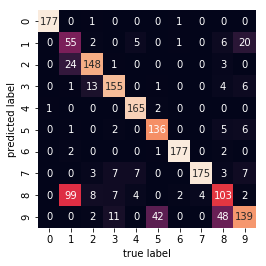

In [158]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
mat = confusion_matrix(data.target, labels)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=data.target_names,
            yticklabels=data.target_names)
plt.xlabel('true label')
plt.ylabel('predicted label');

We can see that the algorithm commonly confu